### https://github.com/dn23

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_mpg= pd.read_csv("mpg.csv")

### Data Exploration

In [3]:
data_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data_mpg=data_mpg.replace('?',np.nan) # replacing question mark as null
data_mpg['horsepower']=pd.to_numeric(data_mpg['horsepower'])#converting horsepower from object to numeric

In [6]:
data_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [7]:
#removing nulls
data_mpg=data_mpg.dropna()
data_mpg=data_mpg.reset_index(drop=True)
data_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 27.6+ KB


In [8]:
data_mpg['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [9]:
data_mpg['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [10]:
data_mpg['model_year'].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model_year, dtype: int64

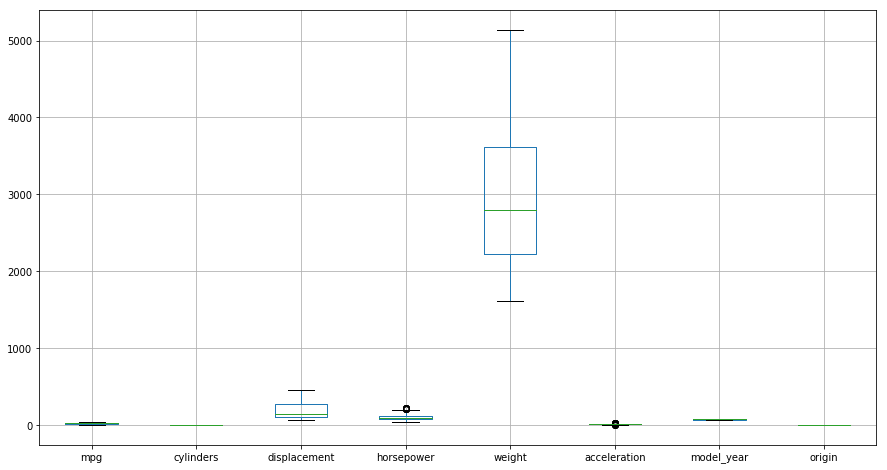

In [11]:
fig,axes=plt.subplots(figsize=(15,8))
data_mpg.boxplot()

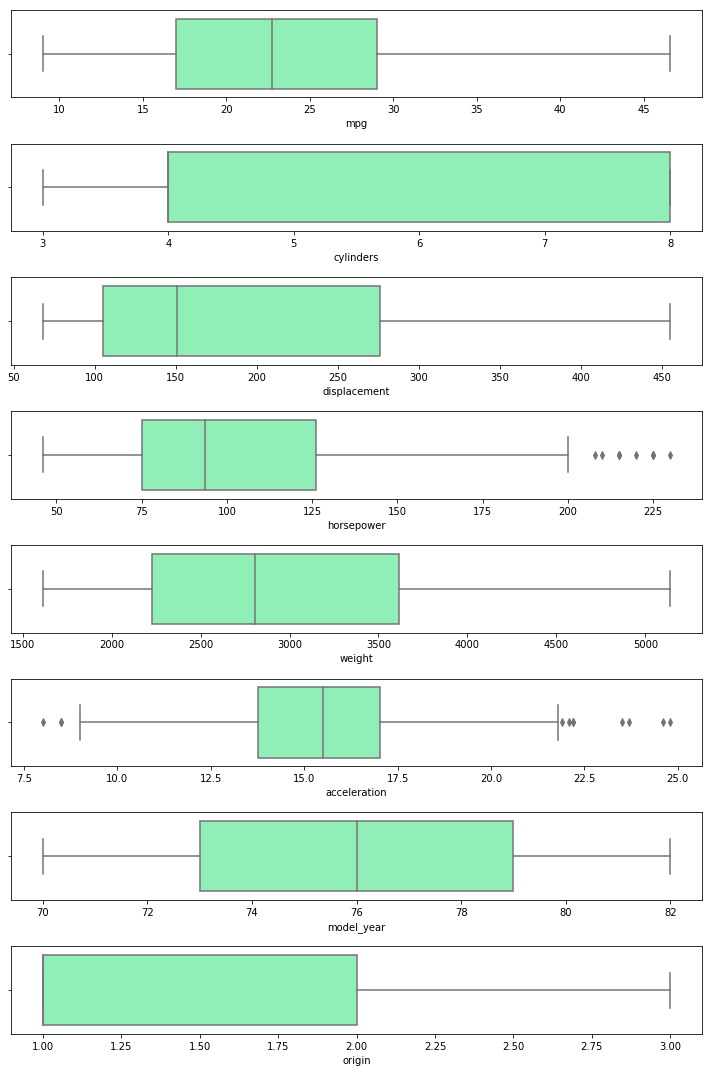

In [12]:
fig,axes=plt.subplots(8,1,figsize=(10,15),sharex=False)
i=0
for col in data_mpg.columns :
    if col!='name' :
        sns.boxplot(data=data_mpg,y=col,orient='h',palette='rainbow',ax=axes[i])
        i=i+1
plt.tight_layout()

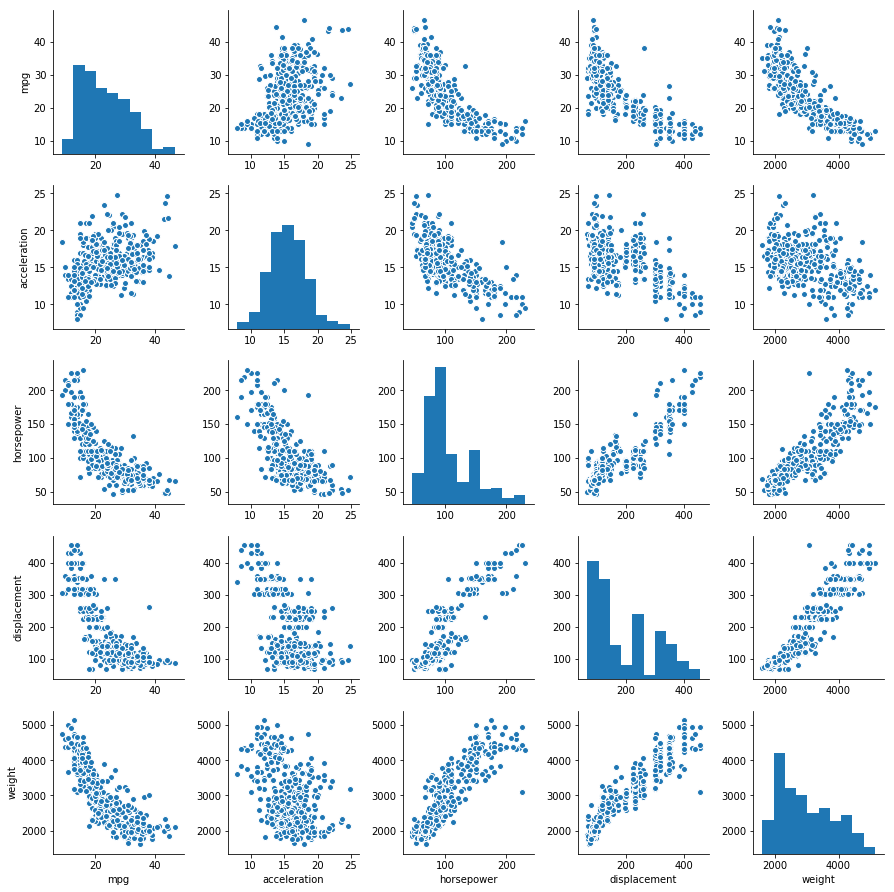

In [13]:
sns.pairplot(data=data_mpg[['mpg','acceleration','horsepower','displacement','weight']])

In [14]:
#one hot encoding the origin variable
dummy=pd.get_dummies(data_mpg['origin'],columns='origin',prefix='origin')
data_mpg=pd.concat([data_mpg,dummy],axis=1)
data_mpg=data_mpg.drop(['origin'],axis=1)

In [15]:
data_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0


In [16]:
#splitting into X and y
X=data_mpg.drop(['mpg','name'],axis=1)
y=data_mpg['mpg']

### Linear Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [18]:
lm.fit(X_train,y_train)
y_predicted=lm.predict(X_test)
print("Train score : ",lm.score(X_train,y_train))
print("Test score : ", lm.score(X_test,y_test))

Train score :  0.81833362219
Test score :  0.828346633699


In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean Squared Error : ",mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_predicted))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test,y_predicted)))

Mean Squared Error :  10.8242276679
Mean Absolute Error :  2.47615749316
Root Mean Squared Error :  3.29001940236


In [20]:
print("The coefficients are : ",lm.coef_)

The coefficients are :  [-0.30053745  0.01596887 -0.01503039 -0.00638944  0.08850321  0.72062134
 -1.69080006  0.79775663  0.89304342]


### Linear regresion with minmaxscaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_predicted=lm.predict(X_test)
lm=LinearRegression()
lm.fit(X_train,y_train)
lm.fit(X_train,y_train)
y_predicted=lm.predict(X_test)
print("Train score : ",lm.score(X_train,y_train))
print("Test score : ", lm.score(X_test,y_test))

Train score :  0.81833362219
Test score :  0.828346633699


In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean Squared Error : ",mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_predicted))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test,y_predicted)))

Mean Squared Error :  10.8242276679
Mean Absolute Error :  2.47615749316
Root Mean Squared Error :  3.29001940236


### Linear regresion with Normalizer

In [23]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
lm=LinearRegression()
lm.fit(X_train_scaled,y_train)
y_predicted=lm.predict(X_test_scaled)
print("Train score : ",lm.score(X_train_scaled,y_train))
print("Test score : ", lm.score(X_test_scaled,y_test))

Train score :  0.867189566135
Test score :  0.865646130159


In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean Squared Error : ",mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_predicted))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test,y_predicted)))

Mean Squared Error :  8.4721721837
Mean Absolute Error :  2.0986835355
Root Mean Squared Error :  2.91069960382


In [25]:
print("The coefficients are : ",lm.coef_)

The coefficients are :  [-10.05714928 -11.69704542 -26.44169061 -33.25182628 -12.2742407
   2.04990541 -17.76791822 -16.13217    -16.37143853]


In [26]:
# corelation between features
corr=data_mpg.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,-0.565161,0.244313,0.451454
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,0.610494,-0.352324,-0.404209
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,0.655936,-0.371633,-0.440825
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.489625,-0.284948,-0.321936
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,0.600978,-0.293841,-0.447929
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,-0.258224,0.208298,0.115020
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.136065,-0.037745,0.199841
origin_1,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,1.000000,-0.591434,-0.648583
origin_2,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,-0.591434,1.000000,-0.230157
origin_3,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.648583,-0.230157,1.000000


In [27]:
#removing displacement too as it's highly correlated with other variables
X=data_mpg.drop(['mpg','name','displacement'],axis=1)
y=data_mpg['mpg']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
lm=LinearRegression(normalize=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [28]:
lm.fit(X_train,y_train)
y_predicted=lm.predict(X_test)
print("Train score : ",lm.score(X_train,y_train))
print("Test score : ", lm.score(X_test,y_test))

Train score :  0.816298490417
Test score :  0.820367160696


In [29]:
#removing outliers (points which are more than 3 standard deviations away from the mean)
data_mpg_without_outliers = data_mpg[data_mpg.drop(['name'],axis=1).apply(lambda x : np.abs((x-x.mean()))/x.std() < 3).all(axis=1)]
data_mpg_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 391
Data columns (total 11 columns):
mpg             385 non-null float64
cylinders       385 non-null int64
displacement    385 non-null float64
horsepower      385 non-null float64
weight          385 non-null int64
acceleration    385 non-null float64
model_year      385 non-null int64
name            385 non-null object
origin_1        385 non-null uint8
origin_2        385 non-null uint8
origin_3        385 non-null uint8
dtypes: float64(4), int64(3), object(1), uint8(3)
memory usage: 28.2+ KB


In [30]:
X=data_mpg_without_outliers.drop(['mpg','name'],axis=1)
y=data_mpg_without_outliers['mpg']
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [32]:
lm.fit(X_train,y_train)
y_predicted=lm.predict(X_test)
print("Train score : ",lm.score(X_train,y_train))
print("Test score : ", lm.score(X_test,y_test))

Train score :  0.827030985564
Test score :  0.804709482319


In [33]:
data_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0


In [34]:
#since removing outliers nor removing highly corelated features improved the model we can use logarithm scaling to normalize the skewed data as shown in the pairplot
#log transformation on horsepower, displacement, weight and mpg
data_mpg['horse_log']=np.log(data_mpg['horsepower'])
data_mpg['displacement_log']=np.log(data_mpg['displacement'])
data_mpg['weight_log']=np.log(data_mpg['weight'])
data_mpg['mpg_log']=np.log(data_mpg['mpg'])

In [35]:
data_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_1,origin_2,origin_3,horse_log,displacement_log,weight_log,mpg_log
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0,4.867534,5.726848,8.161660,2.890372
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0,5.105945,5.857933,8.214194,2.708050
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0,5.010635,5.762051,8.142063,2.890372
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0,5.010635,5.717028,8.141190,2.772589
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0,4.941642,5.710427,8.145840,2.833213


In [36]:
X=data_mpg.drop(['mpg','name','displacement','horsepower','weight','mpg_log'],axis=1)
y=data_mpg['mpg_log']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
lm=LinearRegression(normalize=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)
lm.fit(X_train,y_train)
y_predicted=lm.predict(X_test)
print("Train score : ",lm.score(X_train,y_train))
print("Test score : ", lm.score(X_test,y_test))

Train score :  0.889330010815
Test score :  0.889887652856


In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean Squared Error : ",mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_predicted))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test,y_predicted)))

Mean Squared Error :  0.0128757238933
Mean Absolute Error :  0.0877370774483
Root Mean Squared Error :  0.113471246989


In [38]:
print("The coefficients are : ",lm.coef_)

The coefficients are :  [ -8.77448991e-03  -7.76399761e-03   2.91177242e-02  -2.52144526e-02
   2.38806636e-02   1.59730348e-02  -2.40007862e-01  -4.20603198e-04
  -6.38641207e-01]


### Report
### I first explored the data, and replaced the missing values. The plots showed that a few variables have a skewed distribution and the ranges of the variables were different.
### I ran the regression model on the data without any pre processing and got an r2 score of 82%. After scaling using Normalizer the r2 score increased to 86%.
### Removing outliers didn't improve the model.
### Log transforming the skewed variables including the output improved the r2 score to 89%